# Time Series Forecasting for Tesla Stock Prices

This notebook focuses on building a time series forecasting model to predict Tesla’s future stock prices using models such as ARIMA, SARIMA, or LSTM.

In [24]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

### # Set base directory paths

In [25]:
os.chdir(r'c:\users\ermias.tadesse\10x\Predictive-Analysis-And-Modeling\Data')

# tesla_data_path = 'raw/TSLA.csv'
# tesla_data = pd.read_csv(tesla_data_path)

# # Display the first few rows and column names to verify the structure
# print("Columns in Tesla stock data:")
# print(tesla_data.columns)
# print("\nFirst few rows of Tesla stock data:")
# display(tesla_data.head())

# Set base directory paths
raw_data_path = 'raw/'
processed_data_path = 'processed/'
os.makedirs(processed_data_path, exist_ok=True)


### Define tickers and initialize a dictionary to store data

In [26]:
tickers = ['TSLA', 'BND', 'SPY']
data_dict = {}

###  # Load, inspect, split, and save each dataset


Processing data for TSLA...
Columns in TSLA data:
Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

First few rows of TSLA data:


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02 00:00:00+00:00,28.684000,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03 00:00:00+00:00,29.534000,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06 00:00:00+00:00,30.102667,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07 00:00:00+00:00,31.270666,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08 00:00:00+00:00,32.809334,32.809334,33.232666,31.215334,31.580000,467164500


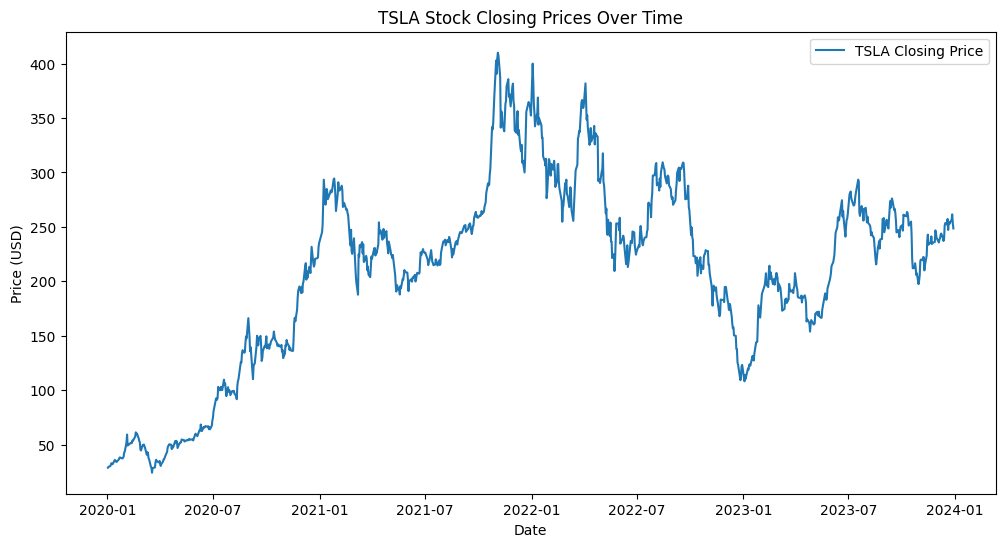

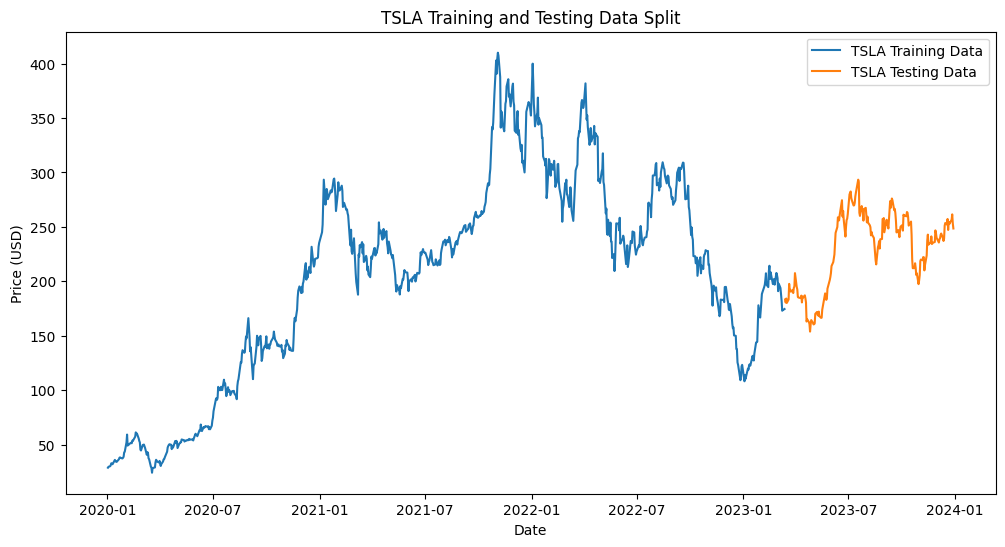


Processing data for BND...
Columns in BND data:
Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

First few rows of BND data:


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02 00:00:00+00:00,73.864647,83.970001,84.110001,83.930000,83.980003,5511000
2020-01-03 00:00:00+00:00,74.128555,84.269997,84.290001,84.099998,84.180000,5368300
2020-01-06 00:00:00+00:00,74.040596,84.169998,84.309998,84.110001,84.300003,3710400
2020-01-07 00:00:00+00:00,73.979019,84.099998,84.199997,84.070000,84.199997,3029900
2020-01-08 00:00:00+00:00,73.864647,83.970001,84.199997,83.900002,84.129997,3674400


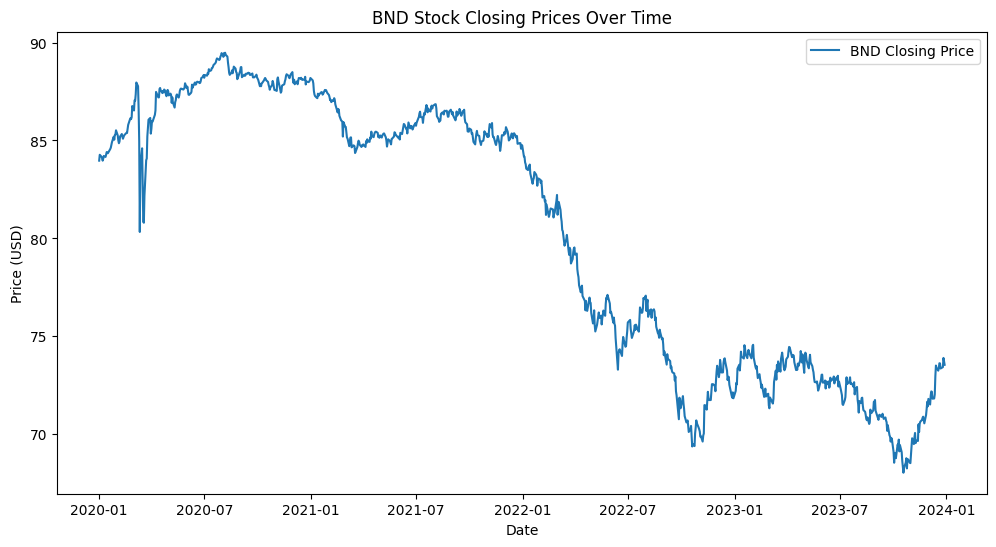

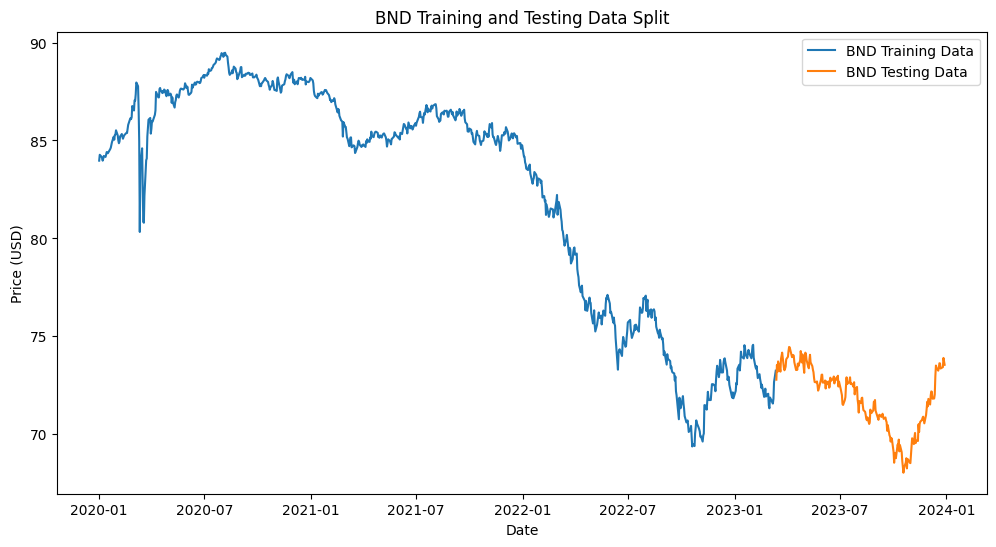


Processing data for SPY...
Columns in SPY data:
Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

First few rows of SPY data:


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02 00:00:00+00:00,302.208588,324.869995,324.890015,322.529999,323.540008,59151200
2020-01-03 00:00:00+00:00,299.920136,322.410004,323.640015,321.100006,321.160004,77709700
2020-01-06 00:00:00+00:00,301.064453,323.640015,323.730011,320.359985,320.489990,55653900
2020-01-07 00:00:00+00:00,300.217895,322.730011,323.540008,322.239990,323.019989,40496400
2020-01-08 00:00:00+00:00,301.817993,324.450012,325.779999,322.670013,322.940002,68296000


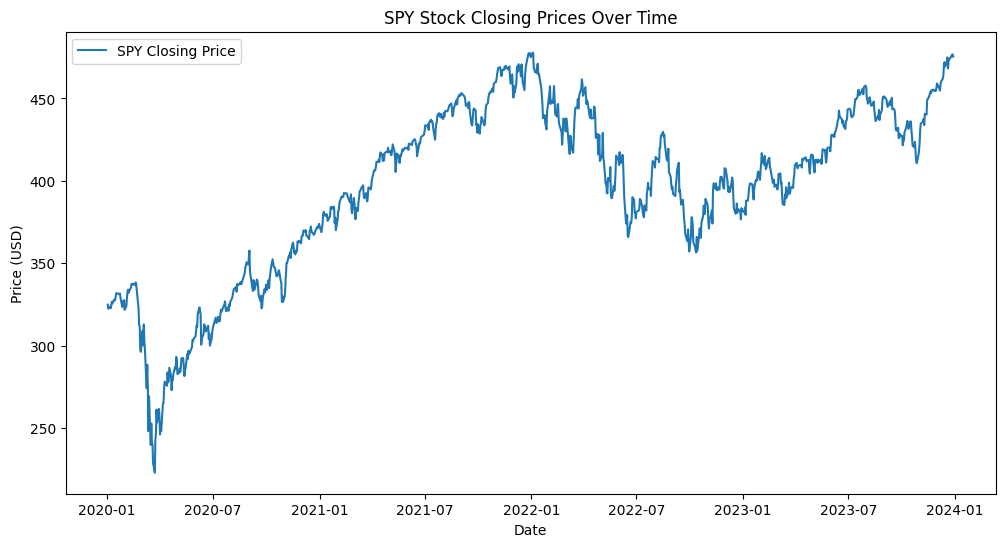

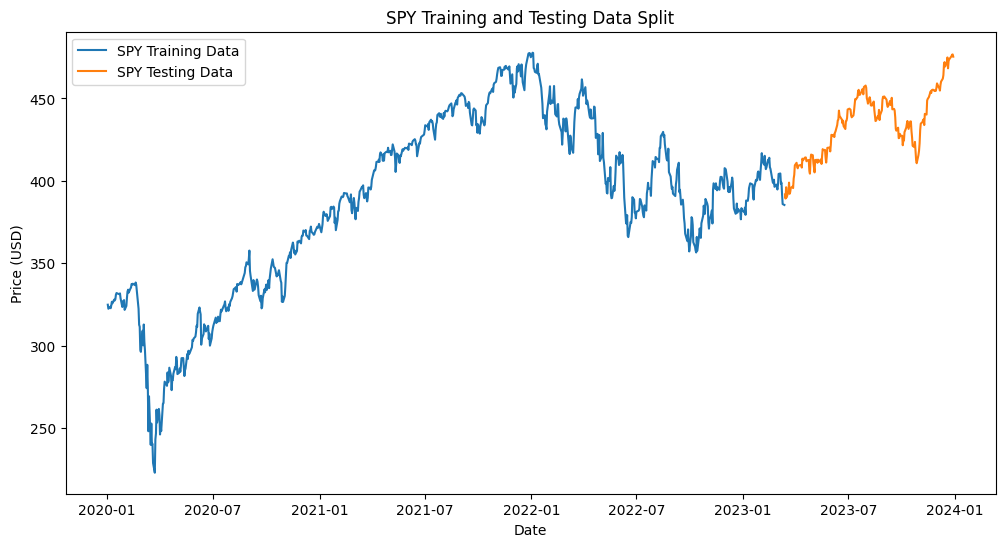

Data processing complete. Training and testing sets saved in 'data/processed/'.


In [27]:
for ticker in tickers:
    print(f"\nProcessing data for {ticker}...")

    # Load data
    file_path = os.path.join(raw_data_path, f'{ticker}.csv')
    data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
    data_dict[ticker] = data  # Store in dictionary for further processing
    
    # Display first few rows
    print(f"Columns in {ticker} data:")
    print(data.columns)
    print(f"\nFirst few rows of {ticker} data:")
    display(data.head())
    
    # Plot the closing prices
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label=f'{ticker} Closing Price')
    plt.title(f'{ticker} Stock Closing Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

    # Define training and testing split
    train_size = int(len(data) * 0.8)
    train_data = data['Close'][:train_size]
    test_data = data['Close'][train_size:]

    # Save training and testing data to processed folder
    train_data.to_csv(os.path.join(processed_data_path, f'{ticker}_train.csv'))
    test_data.to_csv(os.path.join(processed_data_path, f'{ticker}_test.csv'))

    # Plot training and testing split
    plt.figure(figsize=(12, 6))
    plt.plot(train_data, label=f'{ticker} Training Data')
    plt.plot(test_data, label=f'{ticker} Testing Data')
    plt.title(f'{ticker} Training and Testing Data Split')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

print("Data processing complete. Training and testing sets saved in 'data/processed/'.")